In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Displaying the data**

In [3]:
import pandas as pd

# Provide the URL of the file
url = '/content/drive/MyDrive/Datasets/Levine_32dim.fcs.csv'

# Load the dataset
df = pd.read_csv(url)

# Check the first few rows of the dataset
print(df.head())


   Event    Time  Cell_length      DNA1      DNA2    CD45RA     CD133  \
0      1  2693.0           22  4.391057  4.617262  0.162691 -0.029585   
1      2  3736.0           35  4.340481  4.816692  0.701349 -0.038280   
2      3  7015.0           32  3.838727  4.386369  0.603568 -0.032216   
3      4  7099.0           29  4.255806  4.830048  0.433747 -0.027611   
4      5  7700.0           25  3.976909  4.506433 -0.008809 -0.030297   

       CD19      CD22     CD11b  ...     CD117     CD49d    HLA-DR      CD64  \
0 -0.006696  0.066388 -0.009184  ...  0.053050  0.853505  1.664480 -0.005376   
1 -0.016654  0.074409  0.808031  ...  0.089660  0.197818  0.491592  0.144814   
2  0.073855 -0.042977 -0.001881  ...  0.046222  2.586670  1.308337 -0.010961   
3 -0.017661 -0.044072  0.733698  ...  0.066470  1.338669  0.140523 -0.013449   
4  0.080423  0.495791  1.107627  ... -0.006223  0.180924  0.197332  0.076167   

       CD41  Viability  file_number  event_number  label  individual  
0 -0.0019

In [4]:
df

,Event,Time,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,...,CD117,CD49d,HLA-DR,CD64,CD41,Viability,file_number,event_number,label,individual
0,1,2693.00,22,4.391057,4.617262,0.162691,-0.029585,-0.006696,0.066388,-0.009184,...,0.053050,0.853505,1.664480,-0.005376,-0.001961,0.648429,3.627711,307,1.0,1
1,2,3736.00,35,4.340481,4.816692,0.701349,-0.038280,-0.016654,0.074409,0.808031,...,0.089660,0.197818,0.491592,0.144814,0.868014,0.561384,3.627711,545,1.0,1
2,3,7015.00,32,3.838727,4.386369,0.603568,-0.032216,0.073855,-0.042977,-0.001881,...,0.046222,2.586670,1.308337,-0.010961,-0.010413,0.643337,3.627711,1726,1.0,1
3,4,7099.00,29,4.255806,4.830048,0.433747,-0.027611,-0.017661,-0.044072,0.733698,...,0.066470,1.338669,0.140523,-0.013449,-0.026039,-0.026523,3.627711,1766,1.0,1
4,5,7700.00,25,3.976909,4.506433,-0.008809,-0.030297,0.080423,0.495791,1.107627,...,-0.006223,0.180924,0.197332,0.076167,-0.040488,0.283287,3.627711,2031,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265622,265623,707951.44,41,6.826629,7.133022,1.474081,-0.019174,-0.055620,-0.007261,0.063395,...,-0.011105,0.533736,0.123758,-0.042495,-0.027971,0.236957,3.669327,102686,NaN,2
265623,265624,708145.44,45,6.787791,7.154026,0.116755,-0.056213,-0.008864,-0.035158,-0.041845,...,0.143869,1.269464,0.047215,-0.008000,-0.025811,-0.003500,3.669327,102690,NaN,2
265624,265625,708398.44,41,6.889866,7.141219,0.684921,-0.006264,-0.026111,-0.030837,-0.034641,...,0.087102,-0.055912,0.501536,0.053884,-0.042602,0.107206,3.669327,102701,NaN,2
265625,265626,708585.44,39,6.865218,7.144353,0.288761,-0.011310,-0.048786,0.073983,-0.031787,...,-0.047971,0.101955,6.200001,0.296877,0.192786,0.620872,3.669327,102706,NaN,2


In [5]:
df.columns

Index(['Event', 'Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133',
       'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4',
       'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
       'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117',
       'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number',
       'event_number', 'label', 'individual'],
      dtype='object')

In [ ]:
df['Viability']

,Viability
0,0.648429
1,0.561384
2,0.643337
3,-0.026523
4,0.283287
...,...
265622,0.236957
265623,-0.003500
265624,0.107206
265625,0.620872


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265627 entries, 0 to 265626
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Event         265627 non-null  int64  
 1   Time          265627 non-null  float64
 2   Cell_length   265627 non-null  int64  
 3   DNA1          265627 non-null  float64
 4   DNA2          265627 non-null  float64
 5   CD45RA        265627 non-null  float64
 6   CD133         265627 non-null  float64
 7   CD19          265627 non-null  float64
 8   CD22          265627 non-null  float64
 9   CD11b         265627 non-null  float64
 10  CD4           265627 non-null  float64
 11  CD8           265627 non-null  float64
 12  CD34          265627 non-null  float64
 13  Flt3          265627 non-null  float64
 14  CD20          265627 non-null  float64
 15  CXCR4         265627 non-null  float64
 16  CD235ab       265627 non-null  float64
 17  CD45          265627 non-null  float64
 18  CD12

In [ ]:
df.describe()

,Event,Time,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,...,CD117,CD49d,HLA-DR,CD64,CD41,Viability,file_number,event_number,label,individual
count,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,...,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,104184.000000,265627.000000
mean,132814.000000,272948.345014,34.450572,4.606956,5.198308,0.688127,0.145960,0.509301,0.397323,0.710319,...,0.131199,0.794938,1.521812,0.551512,0.261754,0.570037,3.639348,171288.314234,8.116102,1.279625
std,76680.054314,171220.139430,11.446694,1.312831,1.150357,0.609105,0.259267,0.857462,0.762126,1.011434,...,0.313208,0.627619,1.694211,0.888739,0.617065,0.589738,0.018678,123904.361456,2.457486,0.448816
min,1.000000,1.000000,10.000000,2.786488,2.236450,-0.057305,-0.058081,-0.058089,-0.057342,-0.058236,...,-0.057668,-0.058064,-0.057974,-0.058199,-0.058244,-0.057979,3.627711,1.000000,1.000000,1.000000
25%,66407.500000,120196.000000,26.000000,3.700023,4.407822,0.204625,-0.022935,-0.018838,-0.020689,-0.000294,...,-0.023957,0.283013,0.057709,-0.010582,-0.020166,0.065523,3.627711,58679.500000,7.000000,1.000000
50%,132814.000000,253276.000000,33.000000,4.022127,4.698415,0.549387,0.025353,0.075210,0.058790,0.257923,...,-0.000410,0.677212,0.611335,0.122493,0.052229,0.398230,3.627711,152783.000000,8.000000,1.000000
75%,199220.500000,424502.500000,41.000000,6.353313,6.766268,1.031198,0.224299,0.548386,0.386481,0.923517,...,0.154736,1.190787,2.888240,0.604131,0.305591,0.931058,3.669327,282369.000000,10.000000,2.000000
max,265627.000000,709122.440000,65.000000,7.001489,7.472308,6.691197,5.527494,4.990085,5.160477,5.260789,...,5.502125,5.153438,7.052507,4.517843,7.718288,2.433031,3.669327,400112.000000,14.000000,2.000000


### **Finding the column containg null values**

In [6]:
null_count = df.isnull().sum()
print(null_count)

Event                0
Time                 0
Cell_length          0
DNA1                 0
DNA2                 0
CD45RA               0
CD133                0
CD19                 0
CD22                 0
CD11b                0
CD4                  0
CD8                  0
CD34                 0
Flt3                 0
CD20                 0
CXCR4                0
CD235ab              0
CD45                 0
CD123                0
CD321                0
CD14                 0
CD33                 0
CD47                 0
CD11c                0
CD7                  0
CD15                 0
CD16                 0
CD44                 0
CD38                 0
CD13                 0
CD3                  0
CD61                 0
CD117                0
CD49d                0
HLA-DR               0
CD64                 0
CD41                 0
Viability            0
file_number          0
event_number         0
label           161443
individual           0
dtype: int64


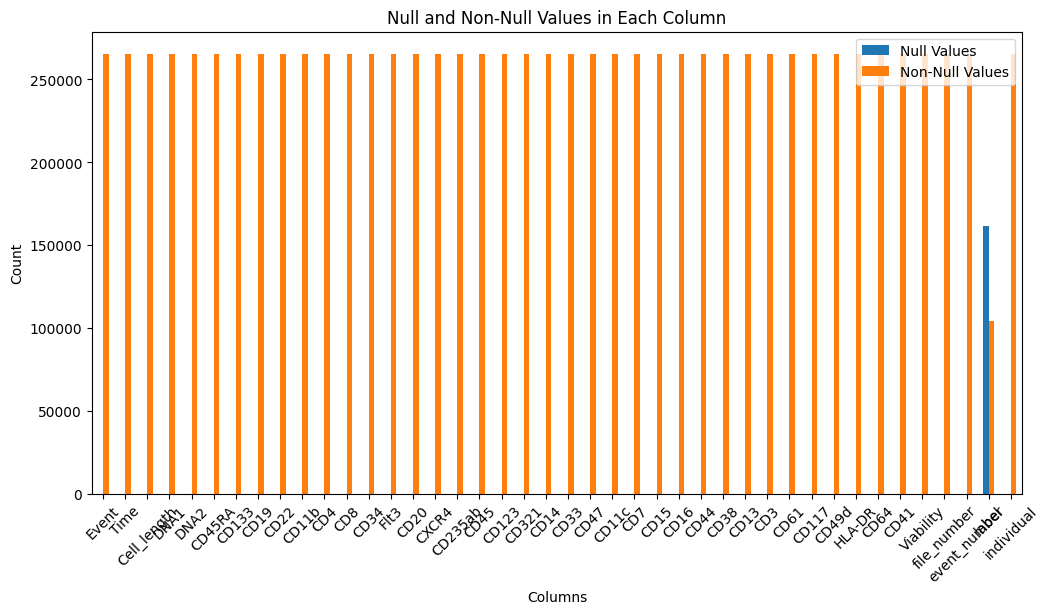

In [ ]:
df = pd.DataFrame(df)
null_values = df.isnull().sum()
non_null_values = df.notnull().sum()
plot_data = pd.DataFrame({
    'Null Values': null_values,
    'Non-Null Values': non_null_values
})
plot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Null and Non-Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [7]:
df = df.drop(columns=['Event','Time','individual','file_number','event_number',])

### **Correlation matrix**

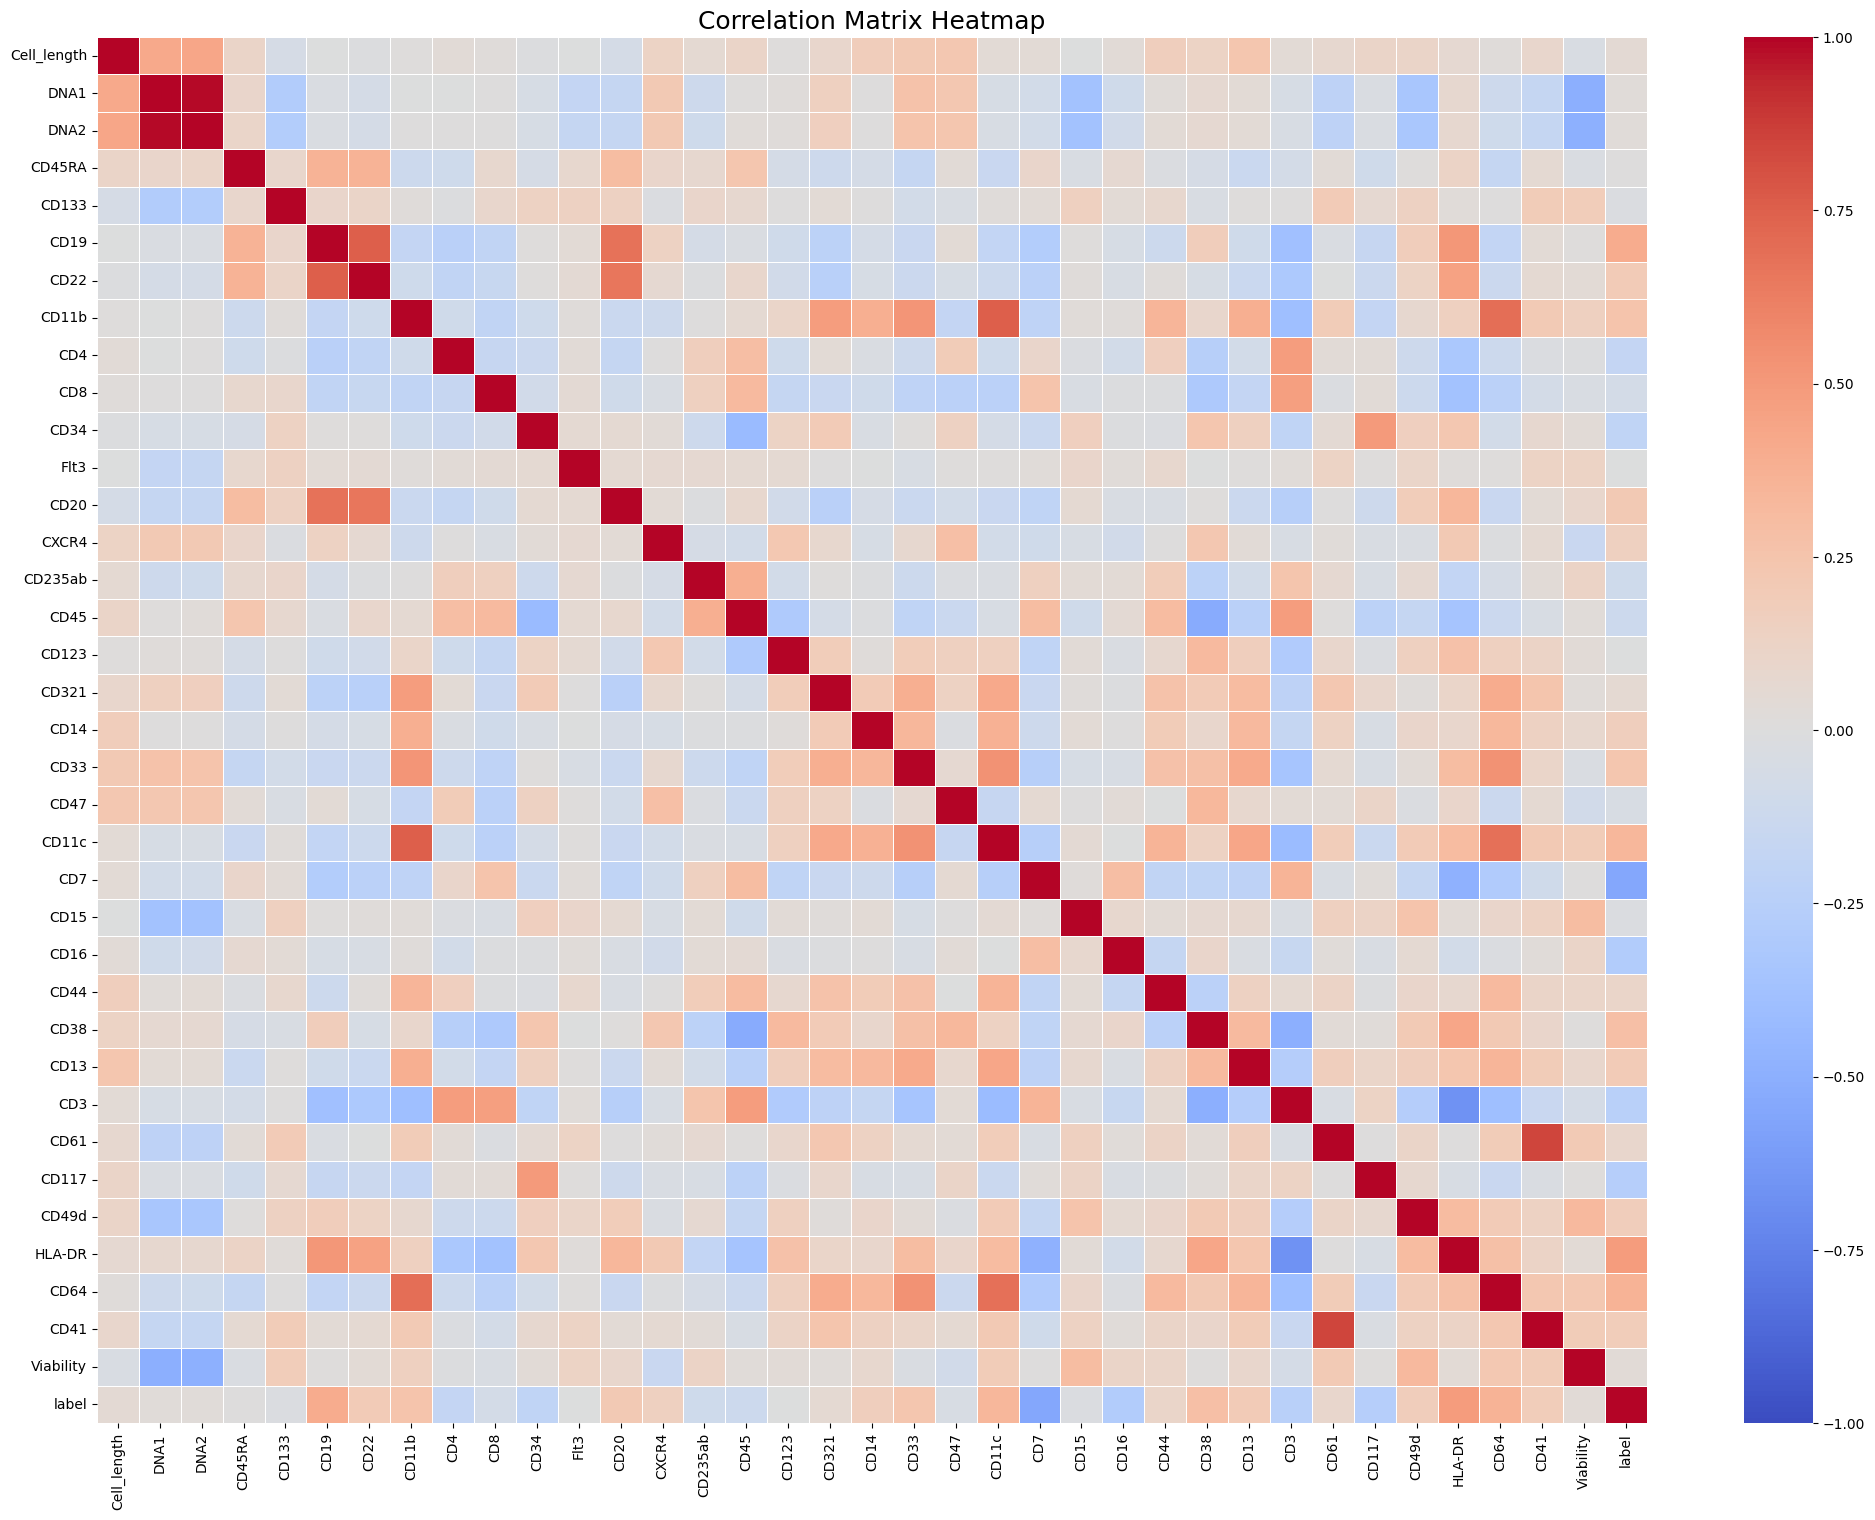

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
correlation_matrix = df.corr()
# Display the correlation matrix
correlation_matrix.round(2)
# Set the figure size
plt.figure(figsize=(25, 18))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot= False , cmap='coolwarm',vmin=-1,vmax=1, linewidths=0.5)
# Add a title
plt.title('Correlation Matrix Heatmap', fontsize=18)
# Show the plot
plt.show()


### **Setting the threshold**


In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of dll the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.8)
len(set(corr_features))

2

In [ ]:
corr_features

{'CD41', 'DNA2'}

### **Finding the range of each column**

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame to store max, min, and range values
summary_df = pd.DataFrame({
    'Max': df[numerical_columns].max(),
    'Min': df[numerical_columns].min(),
    'Range': df[numerical_columns].max() - df[numerical_columns].min()
})

# Display the summary DataFrame
print("Summary of Max, Min, and Range for Each Numerical Column:")
print(summary_df)


Summary of Max, Min, and Range for Each Numerical Column:
                   Max        Min      Range
Cell_length  65.000000  10.000000  55.000000
DNA1          7.001489   2.786488   4.215001
DNA2          7.472308   2.236450   5.235858
CD45RA        6.691197  -0.057305   6.748502
CD133         5.527494  -0.058081   5.585575
CD19          4.990085  -0.058089   5.048174
CD22          5.160477  -0.057342   5.217819
CD11b         5.260789  -0.058236   5.319025
CD4           6.581762  -0.057751   6.639513
CD8           4.693694  -0.058003   4.751697
CD34          5.147996  -0.058008   5.206004
Flt3          7.117323  -0.057884   7.175207
CD20          6.051411  -0.058132   6.109543
CXCR4         5.696674  -0.057042   5.753717
CD235ab       6.646699  -0.057612   6.704311
CD45          7.238076   2.040243   5.197833
CD123         6.640626  -0.058003   6.698630
CD321         6.867388  -0.053552   6.920940
CD14          5.006121  -0.057954   5.064075
CD33          5.612469  -0.058079   5.6705

### **Boxplot**

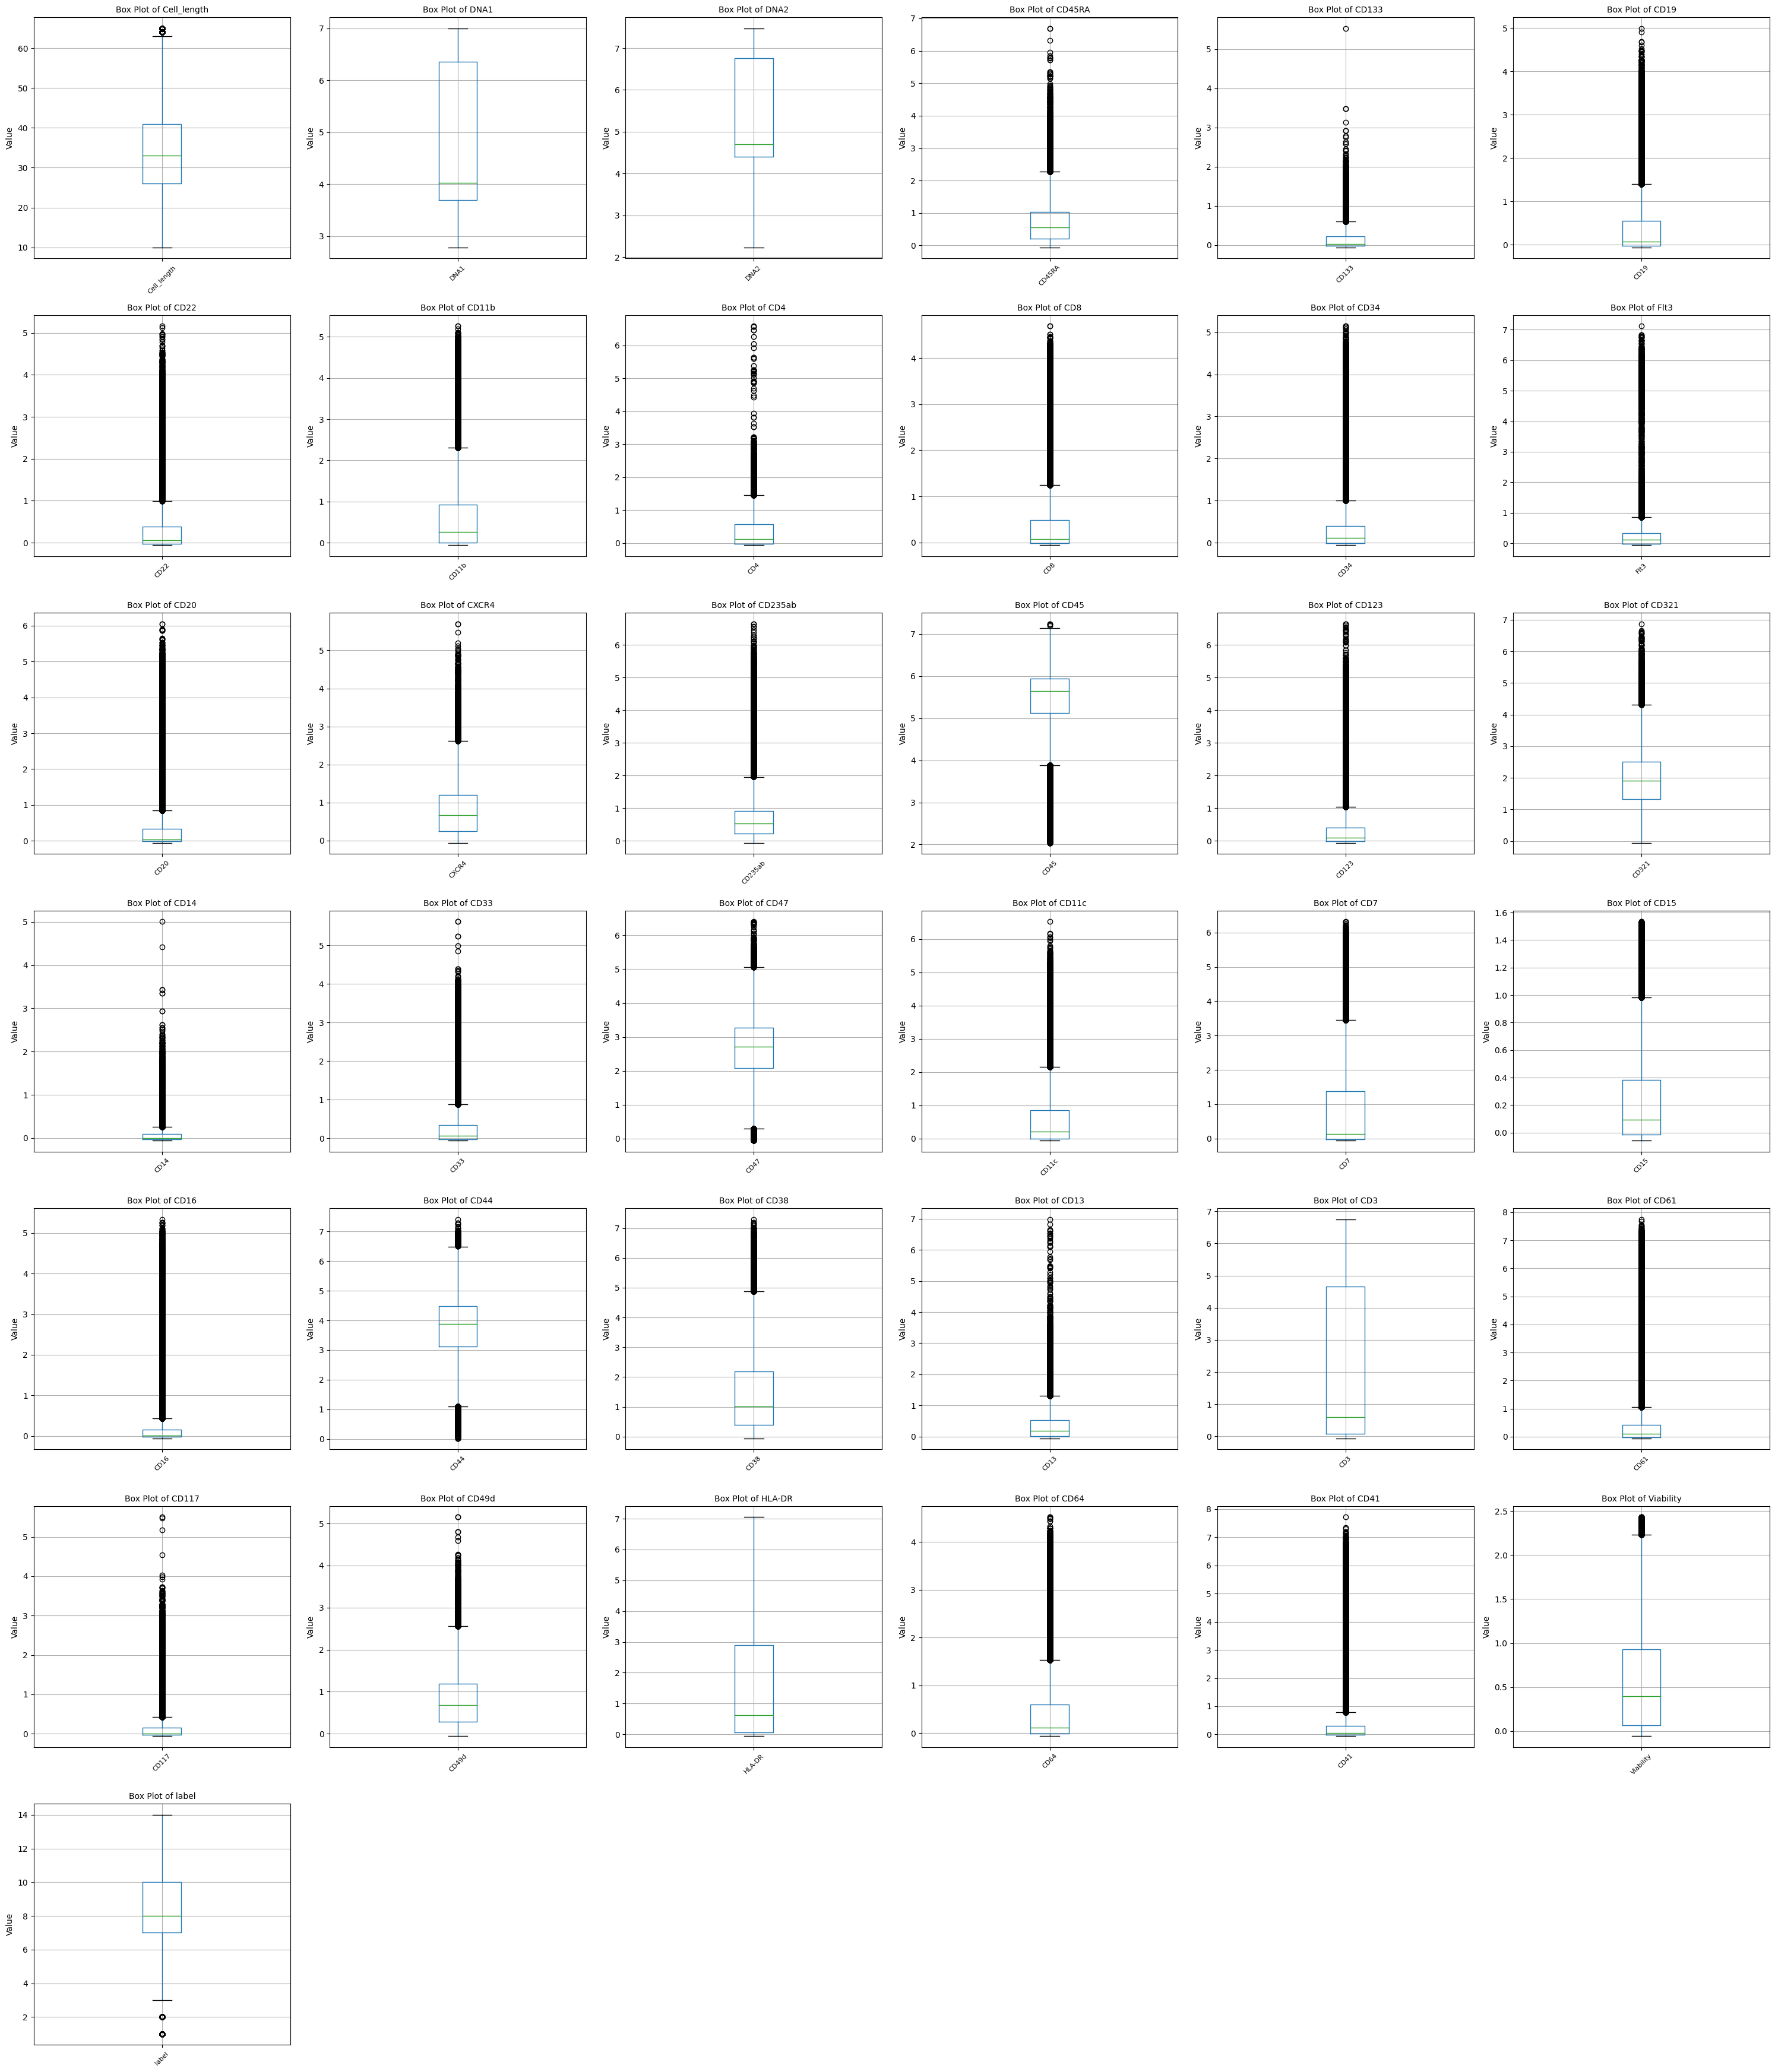

In [ ]:
n_cols = 6  # You can adjust this to 7, 8, 9, or 10 as needed
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Set a suitable figure size
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust height and width based on n_cols and n_rows

# Filter to include only valid numerical columns
valid_numerical_columns = [col for col in numerical_columns if col in df.columns]

# Loop through each valid numerical column to create individual box plots
for i, column in enumerate(valid_numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a grid of subplots
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}', fontsize=10)
    plt.ylabel('Value', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### **Skewness¶**

             Skewness                   Category
Cell_length  0.527832               Right-skewed
DNA1         0.845010               Right-skewed
DNA2         0.779167               Right-skewed
CD45RA       1.191595               Right-skewed
CD133        2.141953               Right-skewed
CD19         1.682609               Right-skewed
CD22         2.283181               Right-skewed
CD11b        1.679089               Right-skewed
CD4          1.622044               Right-skewed
CD8          1.775713               Right-skewed
CD34         3.492437               Right-skewed
Flt3         7.098151               Right-skewed
CD20         2.754699               Right-skewed
CXCR4        0.955342               Right-skewed
CD235ab      2.001479               Right-skewed
CD45        -1.484824                Left-skewed
CD123        3.648890               Right-skewed
CD321        0.247097  Approximately symmetrical
CD14         3.609006               Right-skewed
CD33         2.72497

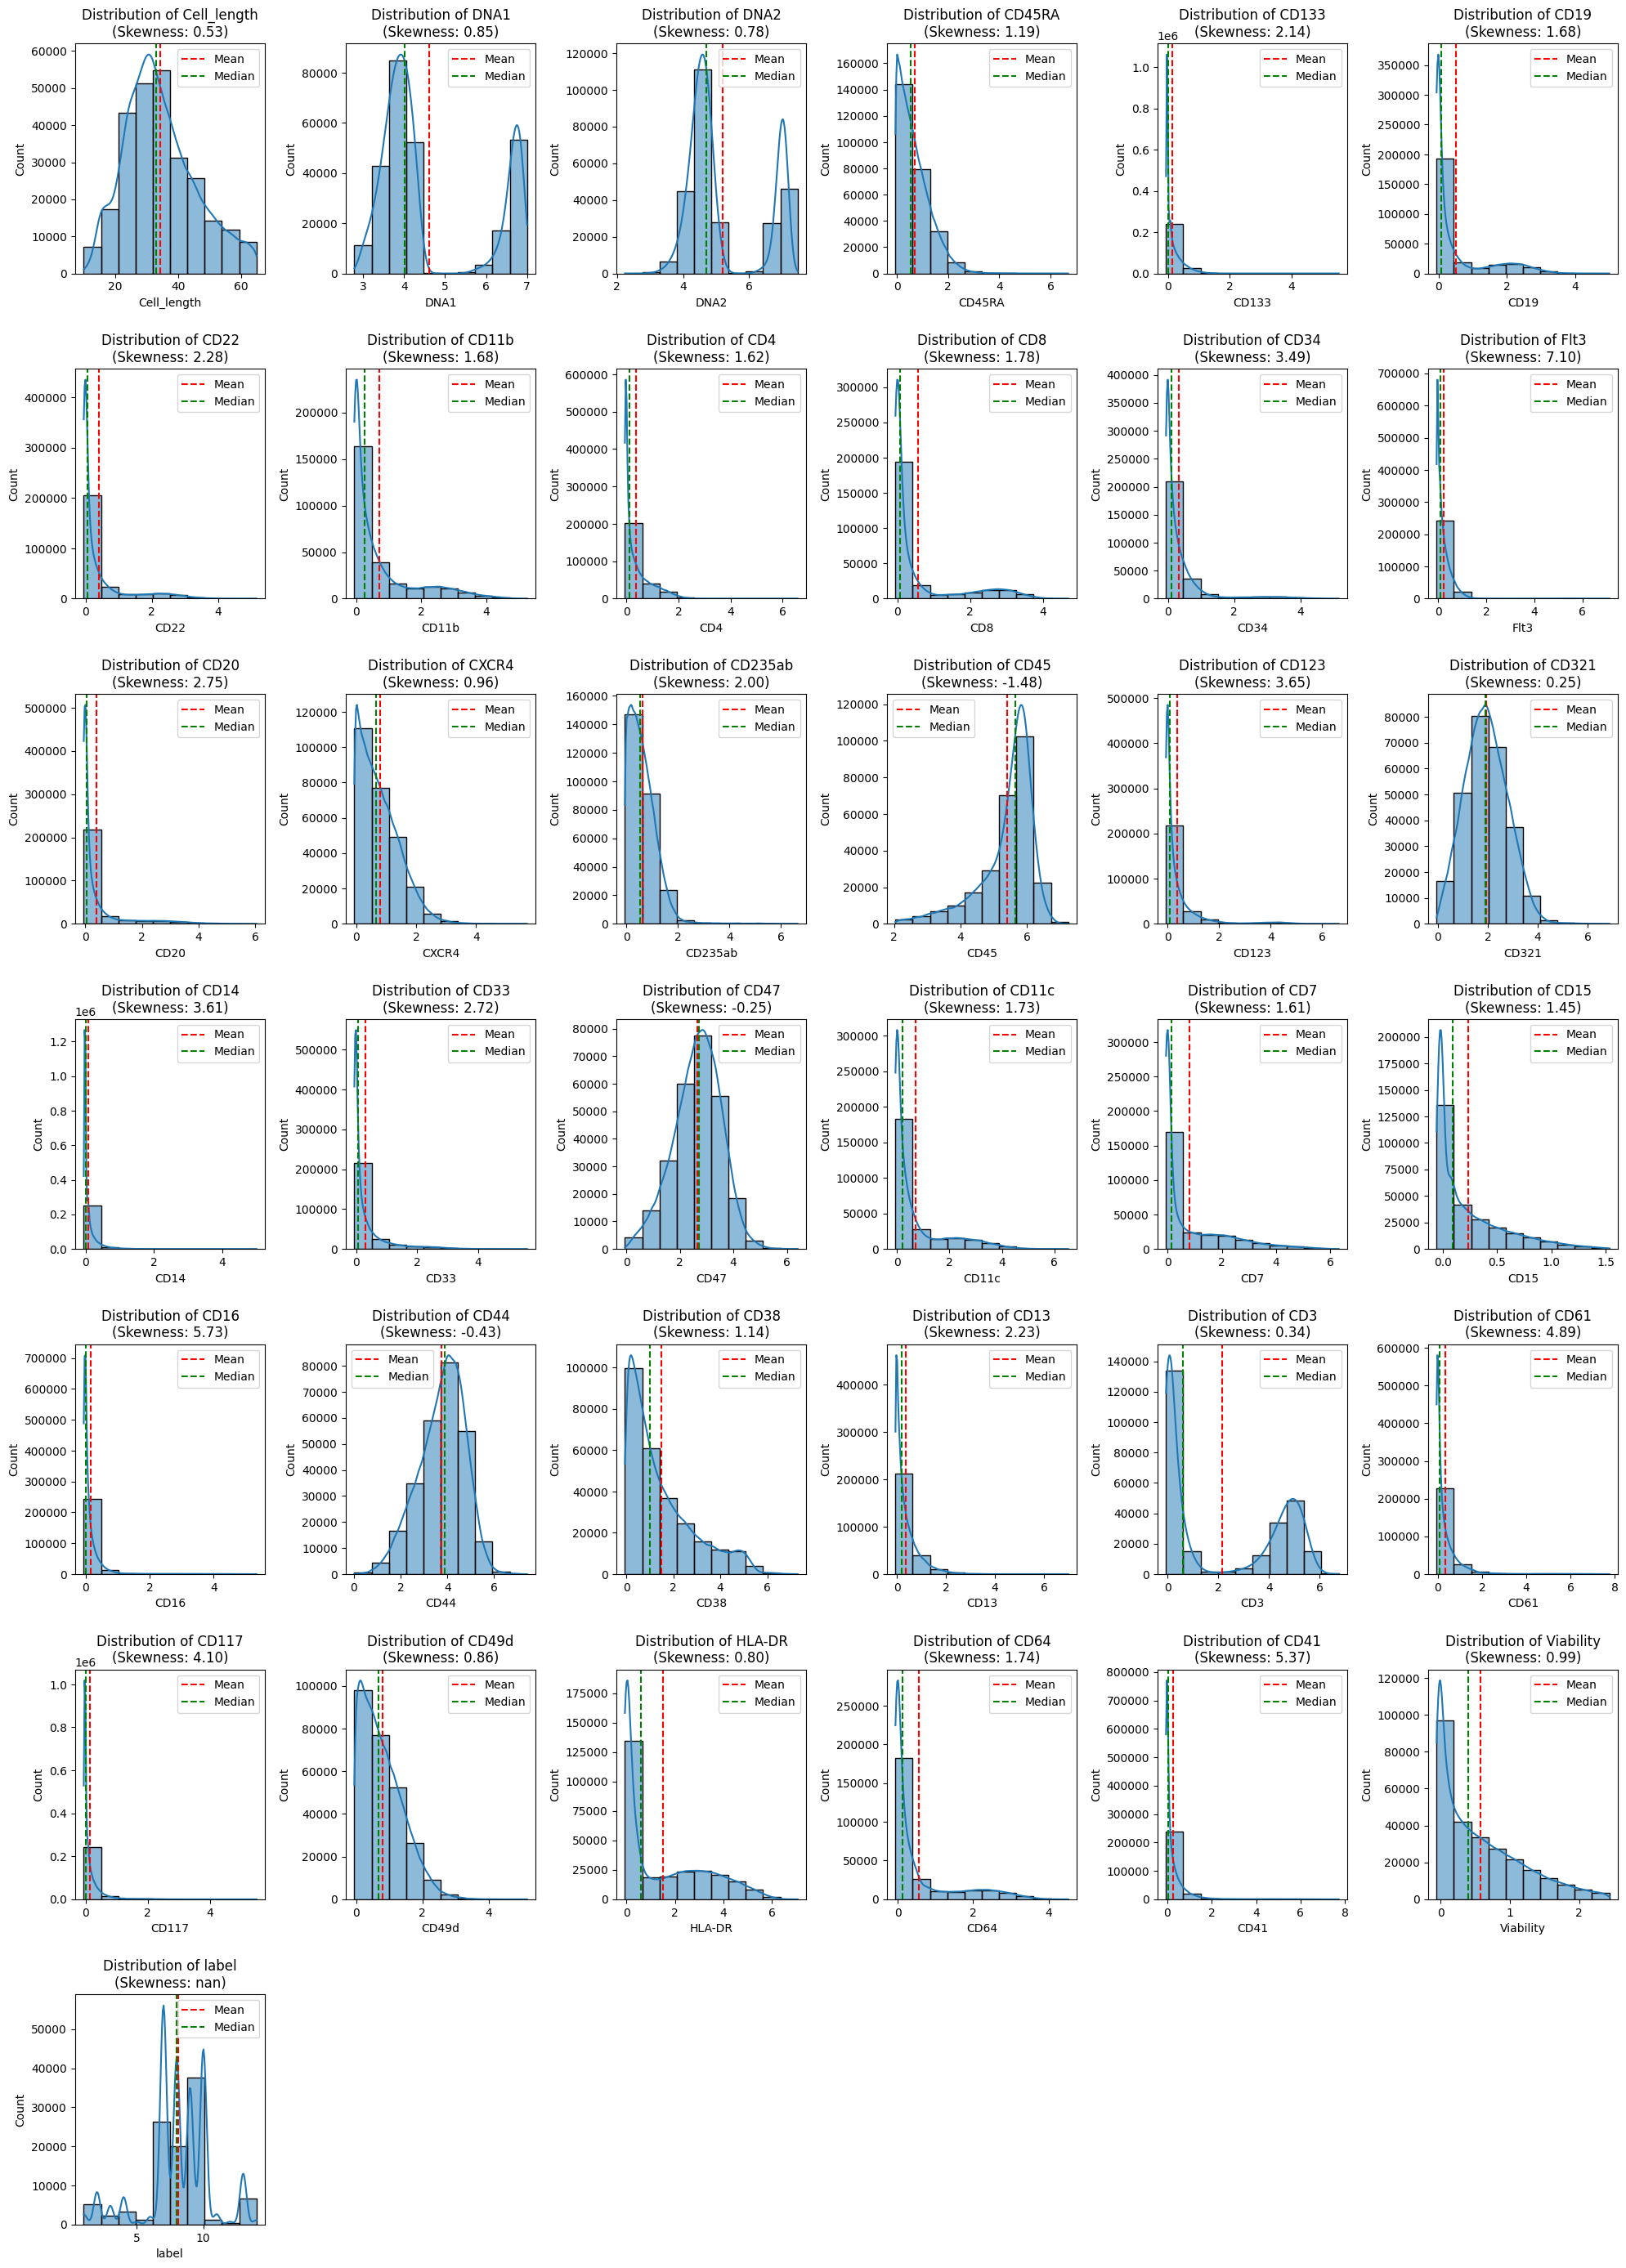

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd

skewness = df.apply(skew)

# Function to categorize skewness
def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'

# Apply the categorization
skewness_category = skewness.apply(categorize_skewness)

# Display skewness and its categorization
skewness_df = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_df)

# Number of numerical columns
num_cols = len(df.columns)

# Create a grid of 6 plots per row
cols_per_row = 6
rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 4))
axes = axes.flatten()  # Flatten to make it easier to iterate through

# Plot histograms for each numerical column
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}\n(Skewness: {skewness[col]:.2f})')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


### **Kurtosis**

                  Column   Kurtosis                   Category
Cell_length  Cell_length   2.834033  Platykurtic (light tails)
DNA1                DNA1   1.994037  Platykurtic (light tails)
DNA2                DNA2   1.975021  Platykurtic (light tails)
CD45RA            CD45RA   4.964272  Leptokurtic (heavy tails)
CD133              CD133   9.190066  Leptokurtic (heavy tails)
CD19                CD19   4.590887  Leptokurtic (heavy tails)
CD22                CD22   7.500223  Leptokurtic (heavy tails)
CD11b              CD11b   4.964495  Leptokurtic (heavy tails)
CD4                  CD4   5.844261  Leptokurtic (heavy tails)
CD8                  CD8   4.745776  Leptokurtic (heavy tails)
CD34                CD34  16.596416  Leptokurtic (heavy tails)
Flt3                Flt3  85.583534  Leptokurtic (heavy tails)
CD20                CD20  10.435449  Leptokurtic (heavy tails)
CXCR4              CXCR4   3.936307  Leptokurtic (heavy tails)
CD235ab          CD235ab  13.440586  Leptokurtic (heavy

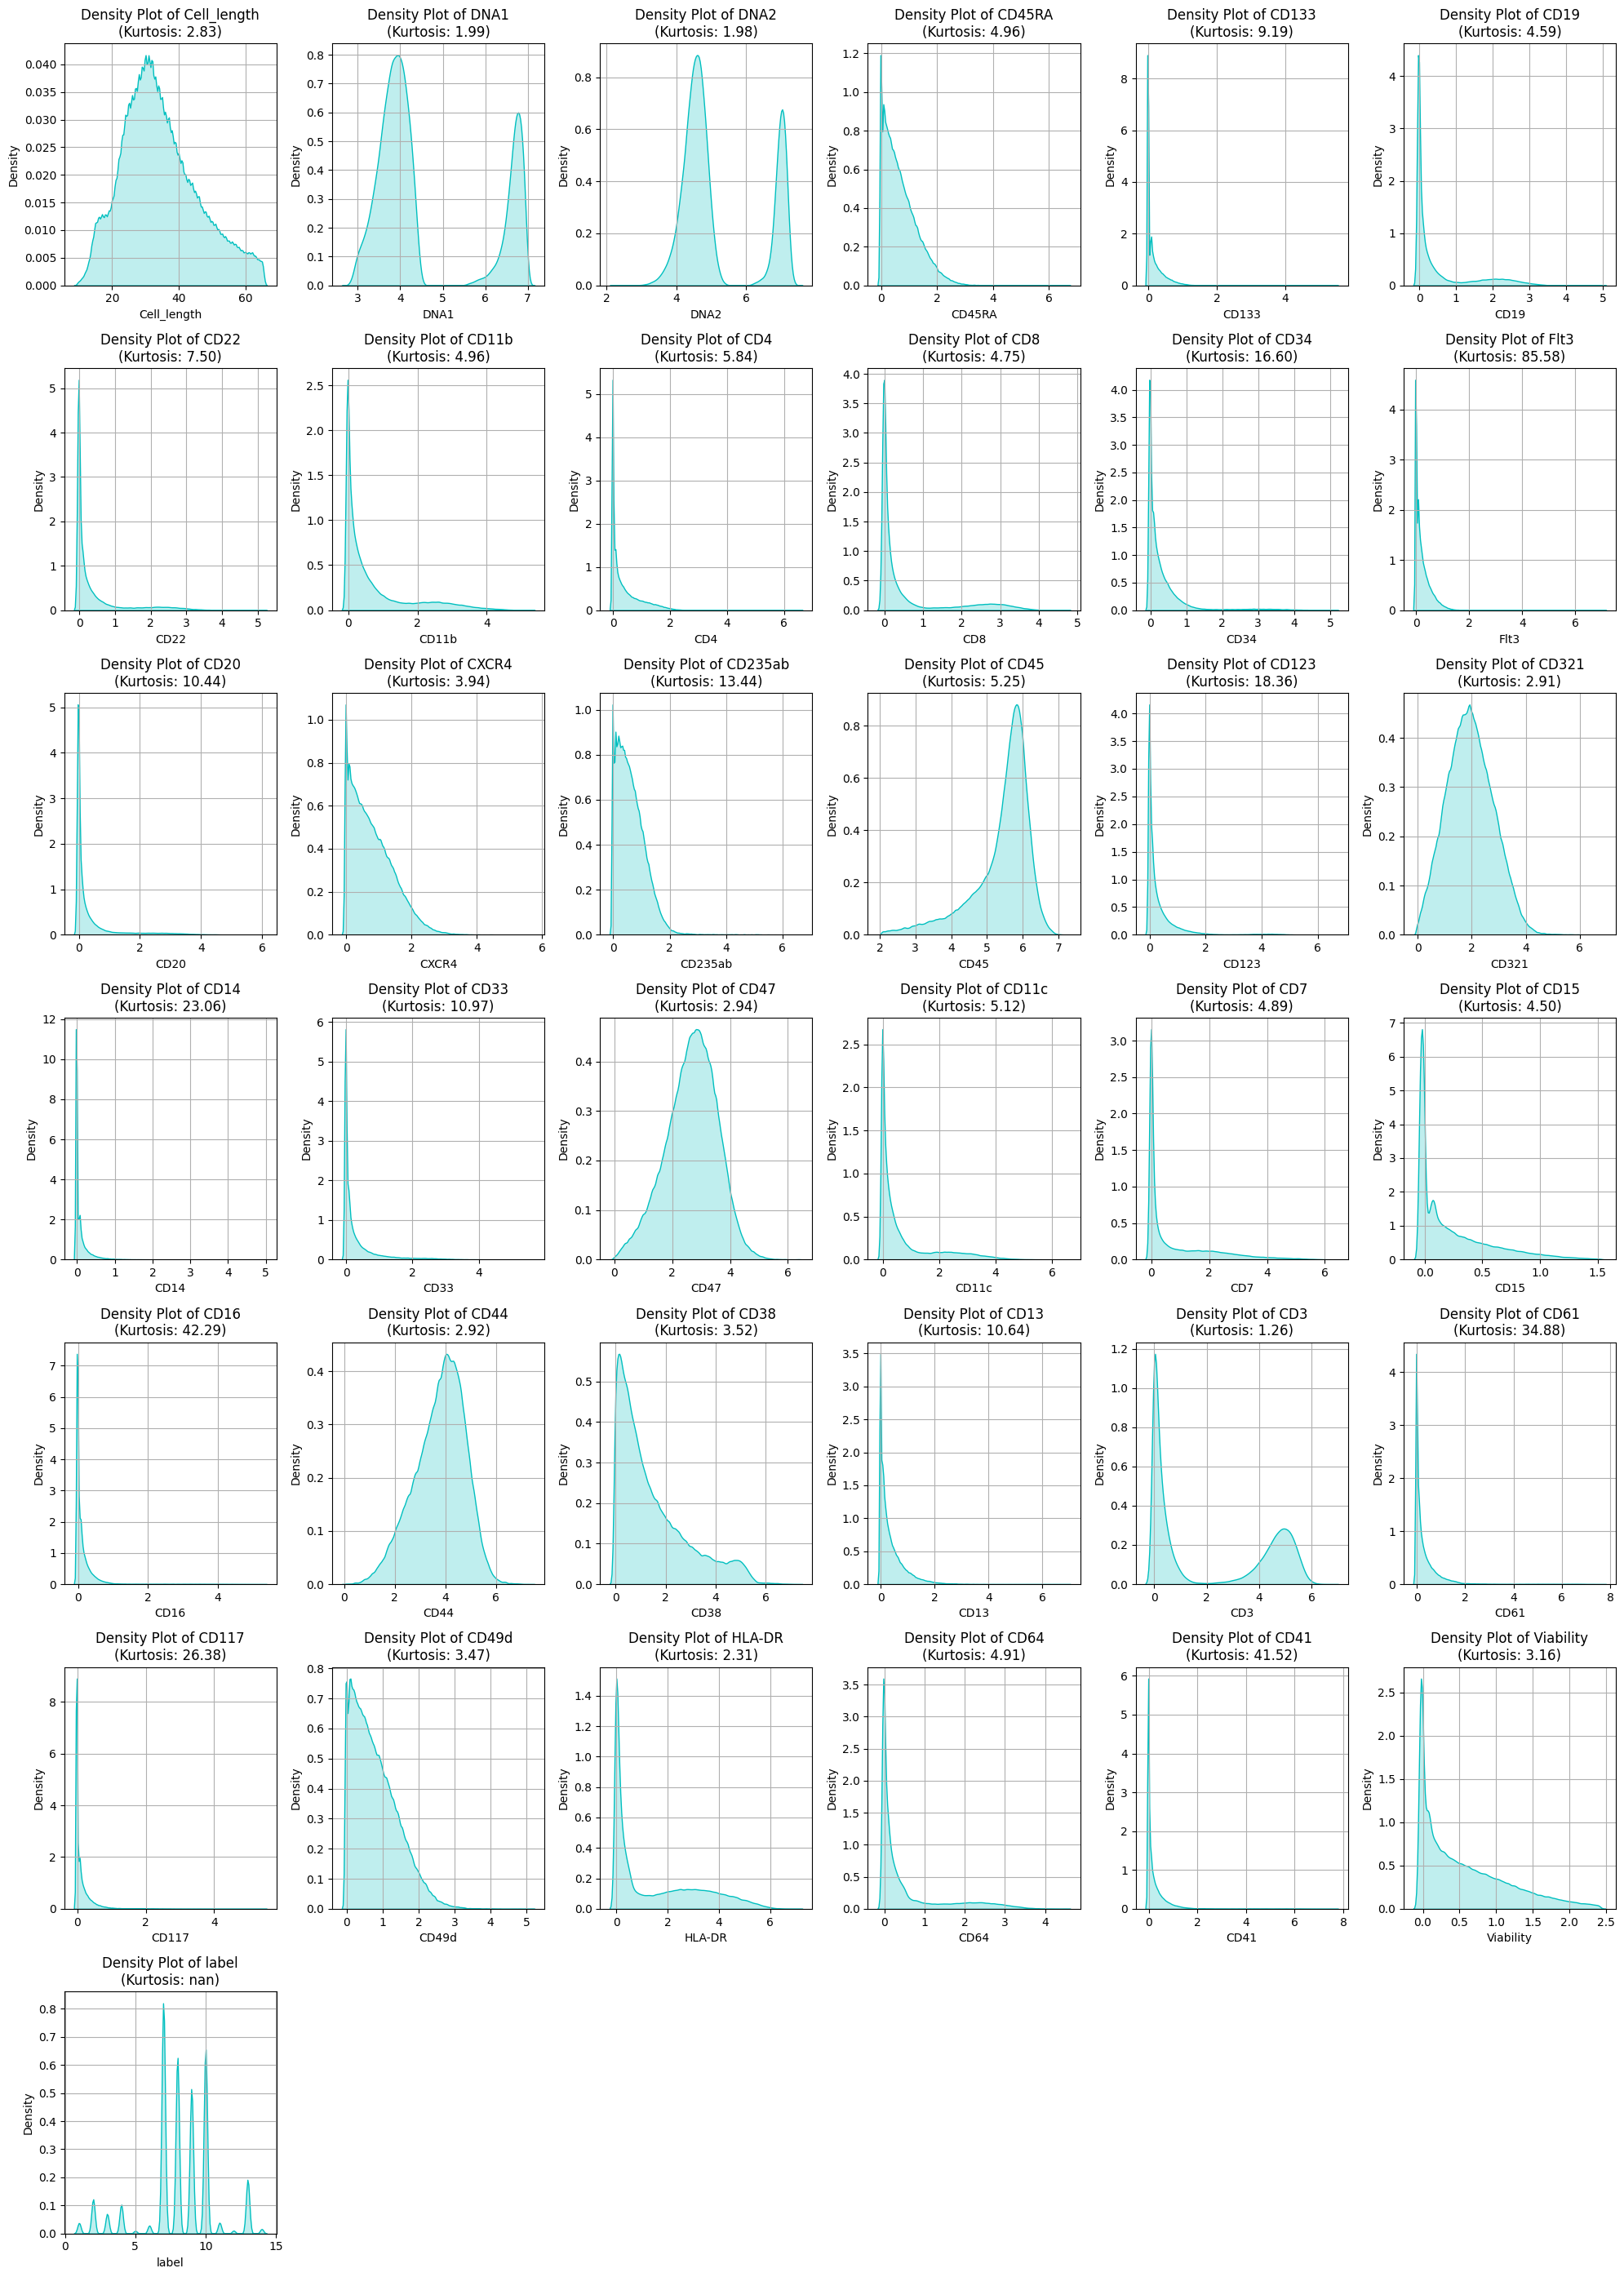

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Calculate kurtosis for each column
kurtosis_values = df.apply(kurtosis, fisher=False)  # Pearson kurtosis (normal = 3)

# Create a DataFrame with kurtosis values
kurtosis_df = pd.DataFrame({'Column': df.columns, 'Kurtosis': kurtosis_values})

# Categorize the kurtosis values (Leptokurtic, Mesokurtic, Platykurtic)
def categorize_kurtosis(value):
    if value > 3:
        return 'Leptokurtic (heavy tails)'
    elif value < 3:
        return 'Platykurtic (light tails)'
    else:
        return 'Mesokurtic (normal tails)'

kurtosis_df['Category'] = kurtosis_df['Kurtosis'].apply(categorize_kurtosis)

# Print the kurtosis values and their categories
print(kurtosis_df)

# Number of numerical columns
num_cols = len(df.columns)

# Create a grid of 6 plots per row
cols_per_row = 6
rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 4))
axes = axes.flatten()  # Flatten the axes array to make iteration easier

# Plot density for each column
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column].dropna(), color='c', fill=True, bw_adjust=0.5, ax=axes[i])  # Adjust bandwidth for smoothness
    axes[i].set_title(f'Density Plot of {column}\n(Kurtosis: {kurtosis_df.loc[kurtosis_df["Column"] == column, "Kurtosis"].values[0]:.2f})')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


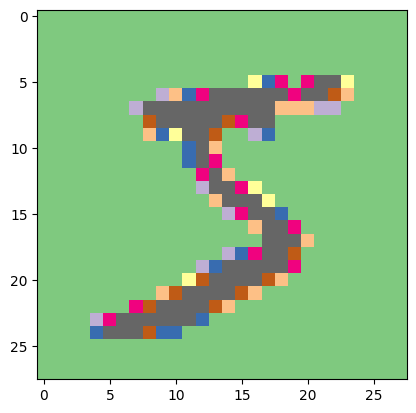

In [ ]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='Accent')

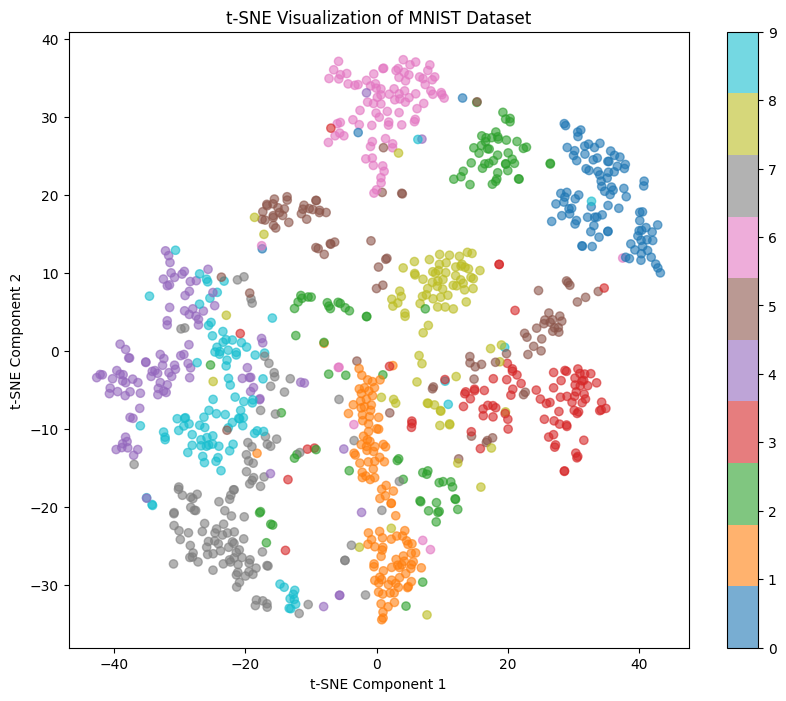

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
train_labels_subset = train_labels[:n_samples]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
train_images_tsne = tsne.fit_transform(train_images_flat)

# plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels_subset, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### **Standardizing the data**

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)


scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

#  Display the first few rows of the standardized data
print(scaled_df.head())


   Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0    -1.087702 -0.164453 -0.505101 -0.862639 -0.677085 -0.601774 -0.434227   
1     0.047999 -0.202977 -0.331737  0.021706 -0.710621 -0.613387 -0.423702   
2    -0.214086 -0.585171 -0.705816 -0.138826 -0.687231 -0.507832 -0.577727   
3    -0.476171 -0.267476 -0.320127 -0.417630 -0.669470 -0.614562 -0.579163   
4    -0.825617 -0.479916 -0.601444 -1.144201 -0.679832 -0.500173  0.129202   

      CD11b       CD4       CD8  ...      CD13       CD3      CD61     CD117  \
0 -0.711371 -0.007722 -0.044861  ... -0.665941 -0.968994 -0.479732 -0.249511   
1  0.096608 -0.778973 -0.573653  ...  2.197090 -0.973786  1.262168 -0.132623   
2 -0.704150 -0.727475 -0.568752  ... -0.312734 -0.813227 -0.120582 -0.271310   
3  0.023115 -0.747355 -0.507239  ...  0.294199 -0.927985 -0.532490 -0.206663   
4  0.392818  0.357861 -0.531946  ...  0.438207 -0.894158 -0.242836 -0.438757   

      CD49d    HLA-DR      CD64      CD41  Viabili

## **PCA for 2D**

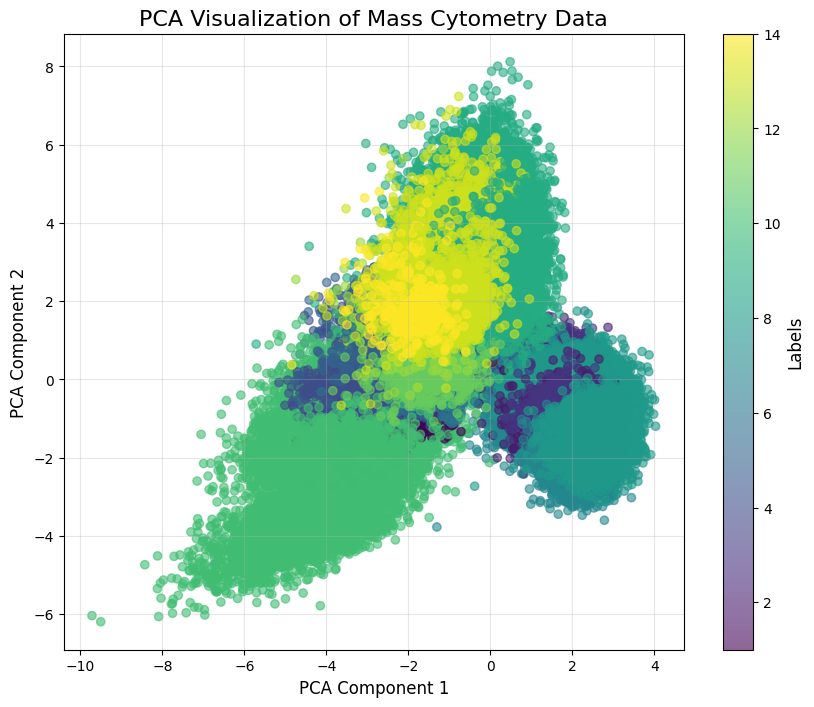

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the data using StandardScaler
# Use all columns except the 'label' column
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['label']))

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Add PCA results back to the original DataFrame
df['PCA1'] = pca_results[:, 0]
df['PCA2'] = pca_results[:, 1]

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df['PCA1'], df['PCA2'],
    c=df['label'],  # Use the label column for coloring
    cmap='viridis',  # 'viridis' colormap for smooth gradients
    alpha=0.6        # Set transparency for better visualization
)

# Add a colorbar to explain the labels
cbar = plt.colorbar(scatter)
cbar.set_label('Labels', fontsize=12)

# Add plot title and axis labels
plt.title('PCA Visualization of Mass Cytometry Data', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Add grid for clarity
plt.grid(alpha=0.3)

# Show the final plot
plt.show()


## **PCA for 3D**

Standard deviation: [2.53583711 2.20245521 1.89526477 1.61107568]
Proportion of Variance: [0.16922225 0.12765239 0.09452671 0.06830408]
Cumulative Proportion: [0.16922225 0.29687464 0.39140135 0.45970543]


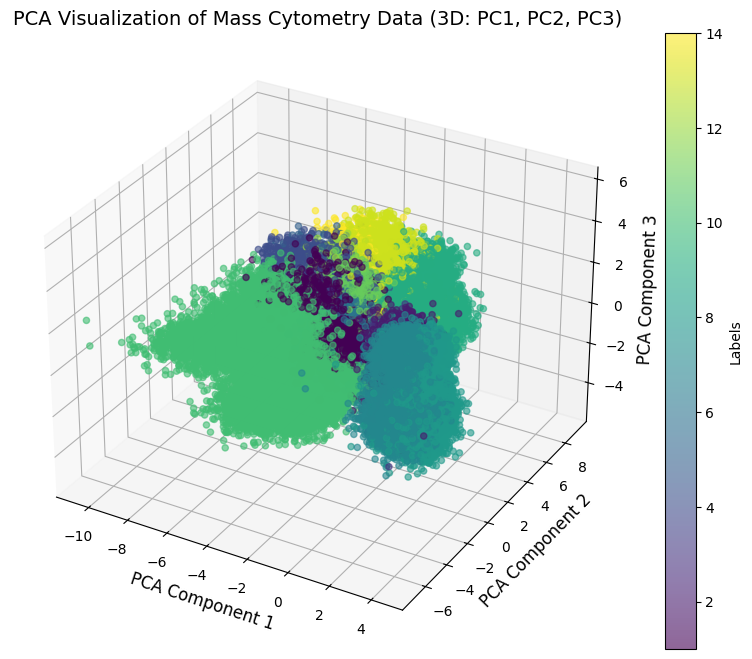

In [13]:
import pandas as pd
import numpy as np  # Ensure this is imported for mathematical operations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
# Use all columns except 'label' for scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['label']))

# Apply PCA with 4 components
pca = PCA(n_components=4)
pca_results = pca.fit_transform(scaled_data)

# Add PCA results back to the DataFrame
df['PCA1'] = pca_results[:, 0]
df['PCA2'] = pca_results[:, 1]
df['PCA3'] = pca_results[:, 2]
df['PCA4'] = pca_results[:, 3]

# Print PCA explained variance results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
standard_deviation = pca.singular_values_ / np.sqrt(len(df) - 1)

print(f"Standard deviation: {standard_deviation}")
print(f"Proportion of Variance: {explained_variance}")
print(f"Cumulative Proportion: {cumulative_variance}")

# 3D scatter plot of the PCA results (PC1, PC2, PC3)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the 'viridis' colormap
scatter = ax.scatter(
    df['PCA1'], df['PCA2'], df['PCA3'],
    c=df['label'], cmap='viridis', alpha=0.6
)

# Add title and axis labels
ax.set_title('PCA Visualization of Mass Cytometry Data (3D: PC1, PC2, PC3)', fontsize=14)
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
ax.set_zlabel('PCA Component 3', fontsize=12)

# Add a colorbar with a label
cbar = fig.colorbar(scatter, ax=ax, label='Labels')

# Show the plot
plt.show()


### **T-SNE**

In [15]:
pip install openTSNE


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.8 MB/s eta 0:00:00


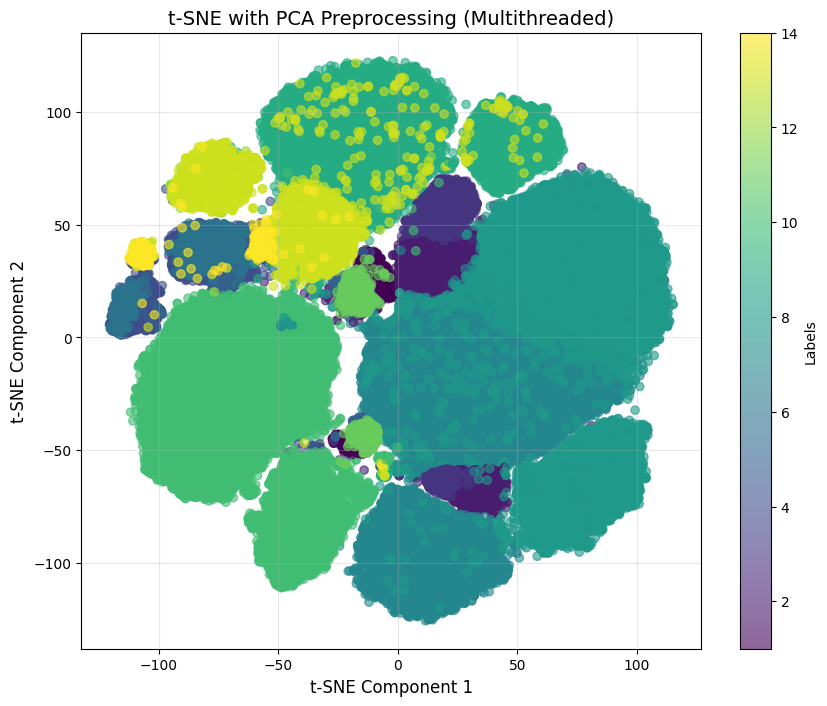

In [16]:
from openTSNE import TSNE
import matplotlib.pyplot as plt

# Step 1: Reduce dimensionality with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca_result = pca.fit_transform(scaled_data)

# Step 2: Apply t-SNE using openTSNE (multithreaded)
# `n_jobs=-1` uses all available CPU cores
tsne = TSNE(
    n_components=2, perplexity=30, n_jobs=-1, random_state=42, initialization="pca"
)
tsne_results = tsne.fit(pca_result)

# Step 3: Add t-SNE results to the dataframe
df['TSNE1'] = tsne_results[:, 0]
df['TSNE2'] = tsne_results[:, 1]

# Step 4: Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df['TSNE1'], df['TSNE2'],
    c=df['label'], cmap='viridis', alpha=0.6
)

# Add a colorbar and labels
cbar = plt.colorbar(scatter, label='Labels')
plt.title('t-SNE with PCA Preprocessing (Multithreaded)', fontsize=14)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()
